Name: Raul Catacora

email: rcatagrundy@gmail.com

# Supervised Machine Learning (Part 1) - Practical Assessment

Total Marks: 20

**Task 1: Understanding Supervised Learning (5 marks)**

Define Supervised Learning (2 marks):
* Provide a concise definition of supervised learning and explain its role in machine learning.

Types of Supervised Learning (3 marks):
* Differentiate between classification and regression tasks.
* Provide two examples for each type, explaining the nature of input features and target labels.

Definition of Supervised learning

Supervised learning is a type of machine learning where the algorithm learns from labeled data, meaning it's provided with input-output pairs during training. The goal is to learn a mapping from inputs to outputs, such that when presented with new, unseen data, the algorithm can predict the correct output based on the input it receives. In supervised learning, the algorithm tries to generalize patterns from the labeled training data to make predictions on unseen data

Overall, supervised learning plays a crucial role in machine learning by enabling algorithms to learn from labeled data and make predictions on unseen data, thus empowering various applications across different fields.

Types of Supervised Learning

1. Nature of Output:

* Classification: In classification tasks, the output variable is categorical, meaning it belongs to a finite set of classes or categories. The goal is to assign input instances to one of these predefined classes.
* Regression: In regression tasks, the output variable is continuous, meaning it can take on any value within a range. The goal is to predict a numerical value based on input features.

2. Output Representation:

* Classification: The output of a classification model is typically a class label or a probability distribution over classes. The model predicts the probability that an input instance belongs to each class and assigns it to the most likely class.
* Regression: The output of a regression model is a single numerical value. The model directly predicts this value based on the input features without categorizing it into discrete classes.

3. Evaluation Metrics:

* Classification: Common evaluation metrics for classification tasks include accuracy, precision, recall, F1-score, and area under the ROC curve (AUC). These metrics assess the performance of the model in terms of its ability to correctly classify instances into their respective classes.
* Regression: Common evaluation metrics for regression tasks include mean squared error (MSE), mean absolute error (MAE), root mean squared error (RMSE), and R-squared (coefficient of determination). These metrics measure the difference between predicted and actual numerical values, quantifying the accuracy of the regression model's predictions.

4. Decision Boundaries:

* Classification: In classification tasks, the decision boundaries separate different classes in the feature space. These boundaries can be linear or nonlinear, depending on the complexity of the classification problem and the choice of algorithm.
* Regression: In regression tasks, there are no clear decision boundaries since the output variable is continuous. Instead, the model learns a function that maps input features to a continuous output space.
In summary, classification and regression tasks differ in terms of the nature of the output variable, representation, evaluation metrics, and the types of problems they address. While classification deals with predicting categorical labels, regression focuses on predicting continuous numerical values.

And the two examples:

Classification Examples:

* Email Spam Detection:

Input Features: Features could include the presence or absence of specific keywords, email sender information, email header metadata, and structural characteristics of the email (e.g., length, number of links).
Target Labels: The target labels would typically be binary: "Spam" or "Not Spam." Each email in the dataset is labeled as either spam or legitimate (not spam).

* Image Classification - Cat vs. Dog:

Input Features: Input features are pixel values of images. Each image is represented as a matrix of pixel intensity values (e.g., grayscale or RGB values).
Target Labels: The target labels are categorical, with two classes: "Cat" or "Dog." The goal is to classify images as either containing a cat or a dog.

Regression Examples:

* House Price Prediction:

Input Features: Features could include the size of the house (in square feet), the number of bedrooms and bathrooms, the location (ZIP code or coordinates), the age of the house, and features related to the neighborhood (e.g., crime rate, school quality).
Target Labels: The target labels are continuous numerical values representing the price of the house in dollars. The goal is to predict the selling price of houses based on their features.

* Temperature Forecasting:

Input Features: Features could include historical temperature data (e.g., daily average, maximum, and minimum temperatures), geographical information (latitude, longitude), seasonal indicators (month, day of the year), and meteorological variables (humidity, wind speed).
Target Labels: The target labels are continuous numerical values representing the temperature in degrees Celsius or Fahrenheit. The goal is to predict future temperatures based on past observations and other relevant factors.




**Task 2: Classification Algorithms (Decision Trees, Naïve Bayes) (5 marks)**

Decision Trees (3 marks):

* Implement a decision tree classifier using Scikit-Learn with a provided dataset.
* Evaluate the model's performance and discuss the key decisions made by the tree.

Naïve Bayes (2 marks):
* Implement a Naïve Bayes classifier with the same dataset.
Compare the performance of the Naïve Bayes classifier with the decision tree.

## Data loading for the Breast cancer dataset from sklearn

In [2]:
# Loading the dataset from sklearn datasets

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_dataset = load_breast_cancer()
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
len(cancer_dataset['feature_names'])

30

In [5]:
# Tranforming the object into a pandas dataframe to start training

data = pd.DataFrame(np.c_[cancer_dataset['data'], cancer_dataset['target']], columns = np.append(cancer_dataset['feature_names'], ['target']))
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [6]:
# Counting the available data for malignant and bening cells

malignant_count = len(data[data['target']==0])
bening_count = len(data[data['target']==1])
index =['malingnant', 'benign']
target = pd.Series(data=[malignant_count, bening_count], index=index)
target

malingnant    212
benign        357
dtype: int64

In [25]:
# Extract features (X) and target labels (y)
X = cancer_dataset.data  # Features
y = cancer_dataset.target  # Target labels (0: malignant, 1: benign)

### Decision tree

In [8]:
# import more libraries for auxiliar and graph code.
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
# Auxiliar function to plot decision tree
def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

In [10]:
# Auxliar function to plot feature importances
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

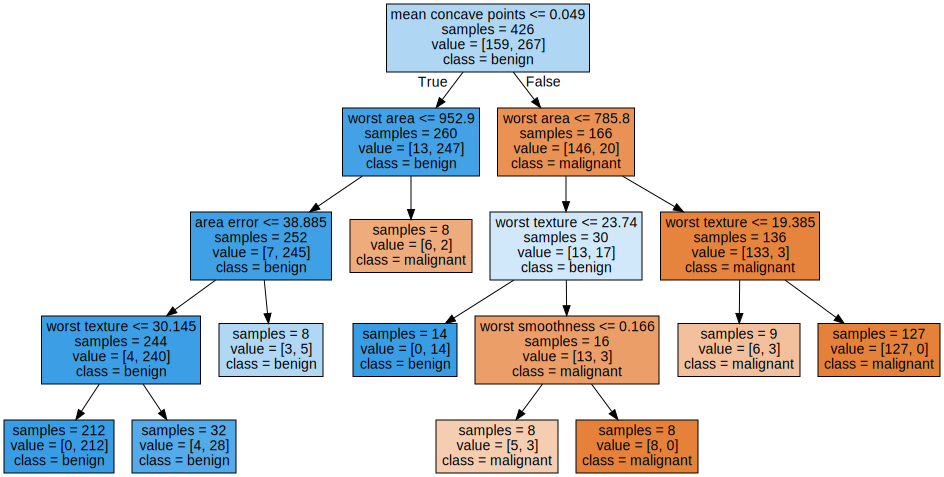

In [11]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)
y_pred = model.predict(X_train)

plot_decision_tree(model, cancer_dataset.feature_names, cancer_dataset.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94
Accuracy of Decision Tree classifier: 0.96
Precision on training data: 0.97
Recall on training data: 0.97
F1 score on training data: 0.97


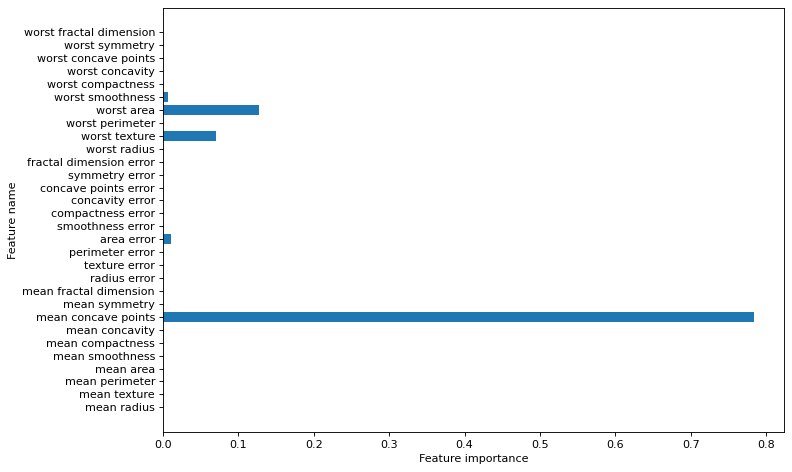

In [12]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))
print('Accuracy of Decision Tree classifier: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('Precision on training data: {:.2f}'.format(precision_score(y_train, y_pred)))
print('Recall on training data: {:.2f}'.format(recall_score(y_train, y_pred)))
print('F1 score on training data: {:.2f}'.format(f1_score(y_train, y_pred)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(model, cancer_dataset.feature_names)
plt.tight_layout()

plt.show()

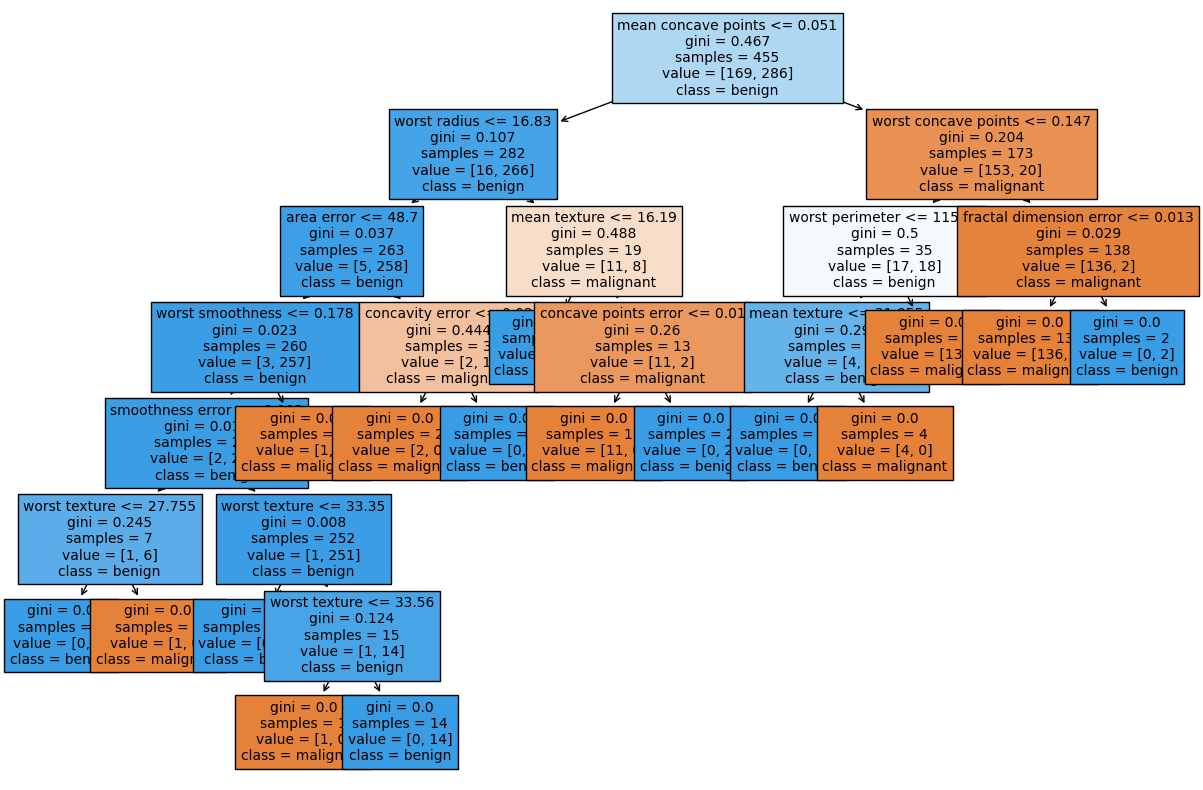

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the trained decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=cancer_dataset.feature_names, class_names=cancer_dataset.target_names, fontsize=10)
plt.show()

### Naives Bayes Classifier

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Accuracy of Naives Bayes classifier: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision on training data: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall on training data: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1 score on training data: {:.2f}'.format(f1_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9385964912280702
Accuracy of Naives Bayes classifier: 0.94
Precision on training data: 0.91
Recall on training data: 1.00
F1 score on training data: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



### Discussion
As other form to graph the decision tree, the key decisions made by the tree correspond to the splits in the feature space that help differentiate between malignant and benign tumors. Each node in the decision tree represents a decision based on a specific feature and threshold, leading to subsequent nodes or leaf nodes, which represent the final class prediction.

In terms of comparison between the decision tree and the naives bayes classifier, the decision tree has a better performance and probably is more adjust to the use case of the dataset choosen


**Task 3: Regression Algorithms (Linear Regression) (5 marks)**

Linear Regression Basics (2 marks):
* Implement a linear regression model using a sample dataset provided.
* Display and interpret the regression line and coefficients.

Model Evaluation in Regression (3 marks):

* Evaluate the linear regression model using appropriate metrics (e.g., Mean Squared Error).
* Discuss the practical implications of the model's performance.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [22]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09385109288014665


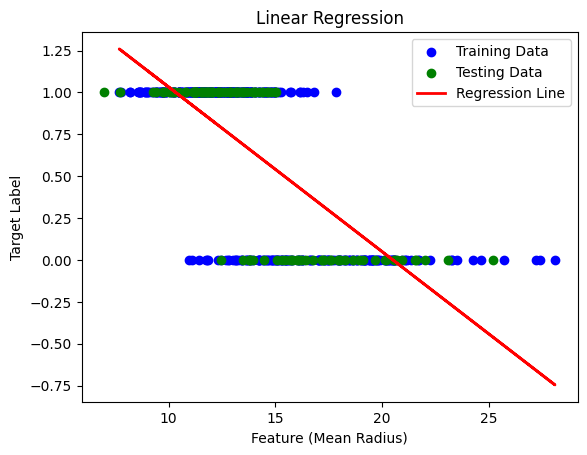

Intercept: 2.0154354797965857
Slope: -0.09823628639162031


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Extract features (X) and target labels (y)
X = cancer_dataset.data[:, np.newaxis, 0]  # Using only one feature for simplicity (mean radius)
y = cancer_dataset.target  # Target labels (0: malignant, 1: benign)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Plot the data points and the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('Feature (Mean Radius)')
plt.ylabel('Target Label')
plt.legend()
plt.show()

# Print the coefficients
print("Intercept:", intercept)
print("Slope:", slope)

### Discussion
Interpreting the coefficients:

* The intercept (intercept) represents the value of the target variable when the predictor variable is zero.

* The slope (slope) represents the change in the target variable for a one-unit change in the predictor variable. In this case, it indicates how much the target label changes for a one-unit increase in the mean radius.

As a rule of thumb,  the practical implications of the linear regression model extend beyond its predictive performance and can influence various aspects of healthcare delivery, research, and policy development related to breast cancer prevention, diagnosis, and treatment. However, it's important to interpret the model's results cautiously and consider them in conjunction with clinical expertise and other relevant information.

**Task 4: Data Understanding with Statistics (5 marks)**

Descriptive Statistics (3 marks):
* Calculate and interpret mean, median, and standard deviation for a given dataset.
* Create visualizations, such as histograms and box plots, to represent the data distribution.

Statistical Visualization (2 marks):
* Choose one visualization method (e.g., scatter plot or box plot) to represent relationships or trends in a dataset.
* Provide a brief explanation of why the selected visualization is suitable.

In [26]:
# Extract features (X) and target labels (y)
X = cancer_dataset.data  # Features
y = cancer_dataset.target  # Target labels (0: malignant, 1: benign)

In [27]:
feature_names = cancer_dataset.feature_names
statistics = []

for i, feature_name in enumerate(feature_names):
    feature_values = X[:, i]
    mean = np.mean(feature_values)
    median = np.median(feature_values)
    std_dev = np.std(feature_values)
    statistics.append((feature_name, mean, median, std_dev))

# Print the statistics
print("Descriptive Statistics for Breast Cancer Dataset:")
print("{:<30} {:<15} {:<15} {:<15}".format("Feature", "Mean", "Median", "Standard Deviation"))
for stat in statistics:
    print("{:<30} {:<15.2f} {:<15.2f} {:<15.2f}".format(stat[0], stat[1], stat[2], stat[3]))

Descriptive Statistics for Breast Cancer Dataset:
Feature                        Mean            Median          Standard Deviation
mean radius                    14.13           13.37           3.52           
mean texture                   19.29           18.84           4.30           
mean perimeter                 91.97           86.24           24.28          
mean area                      654.89          551.10          351.60         
mean smoothness                0.10            0.10            0.01           
mean compactness               0.10            0.09            0.05           
mean concavity                 0.09            0.06            0.08           
mean concave points            0.05            0.03            0.04           
mean symmetry                  0.18            0.18            0.03           
mean fractal dimension         0.06            0.06            0.01           
radius error                   0.41            0.32            0.28           

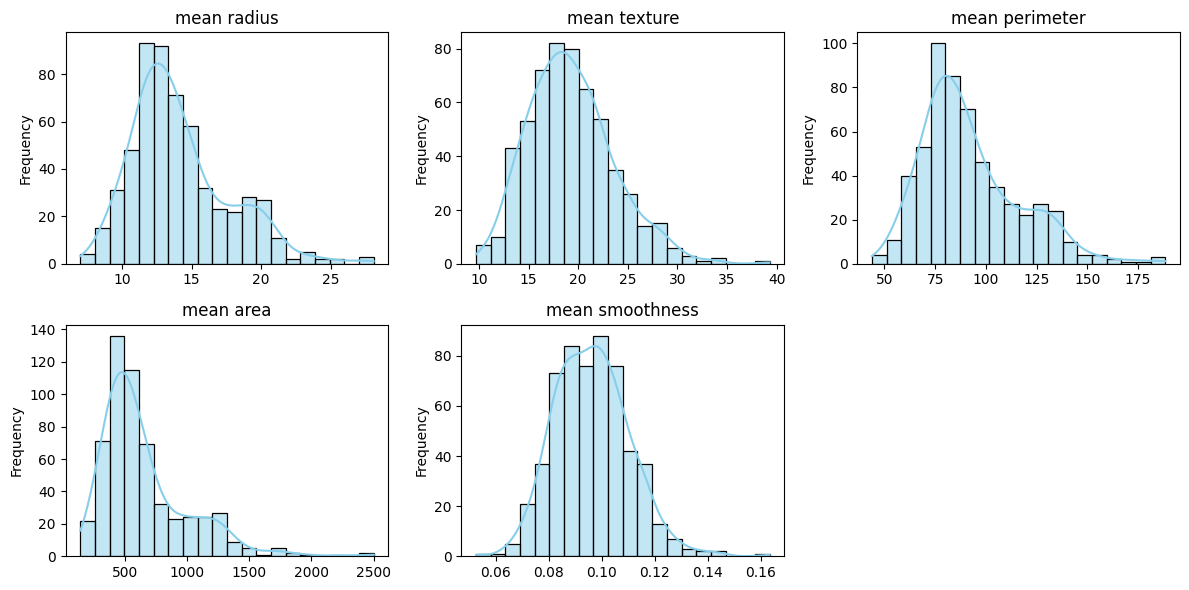

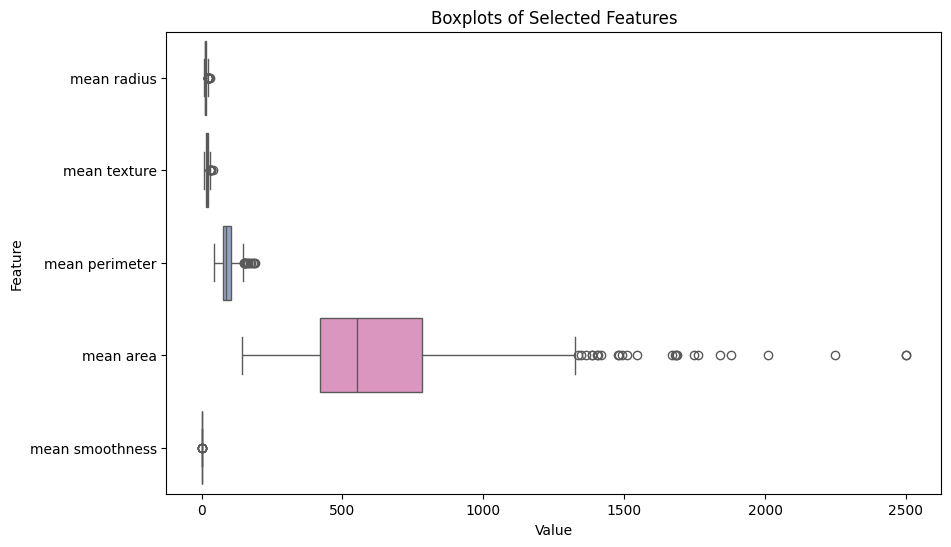

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to pandas DataFrame for easier visualization
df = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)

# Select a subset of features for visualization
features_subset = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

# Create histograms for selected features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_subset, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=20)
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Create boxplots for selected features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features_subset], orient='h', palette='Set2')
plt.title('Boxplots of Selected Features')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

Using boxplots on the breast cancer dataset can be beneficial for several reasons:

1. Identifying outliers: Boxplots provide a clear visual representation of the distribution of data, including the presence of outliers. Outliers in medical datasets like the breast cancer dataset could be indicative of measurement errors or rare pathological cases. Identifying and understanding outliers is crucial for ensuring the quality of the dataset and the robustness of the analysis.

2. Comparing feature distributions: Boxplots allow for easy comparison of the distributions of different features within the dataset. This comparison can reveal patterns or differences in the data that might not be immediately apparent from summary statistics alone. For example, you can compare the spread and central tendency of features between malignant and benign tumors to identify potential discriminative features.

3. Assessing variability: The length of the box in a boxplot represents the interquartile range (IQR), which provides a measure of variability in the data. Features with larger IQRs may exhibit more variability in their values, which could be relevant for understanding the heterogeneity of tumors or identifying features associated with disease progression.

4. Visualizing central tendency and spread: Boxplots display the median (or 50th percentile) as well as the quartiles (25th and 75th percentiles) of the data distribution. This provides a concise summary of the central tendency and spread of each feature, helping to characterize the dataset and identify potential patterns or trends.

5. Spotting potential relationships: Boxplots can also be used to visually assess relationships between features and target variables. For example, you can create boxplots of feature values grouped by tumor type (malignant vs. benign) to observe how feature distributions vary between the two classes, which can provide insights into feature importance for classification tasks.

In general, boxplots serve as a valuable exploratory tool for understanding the characteristics of the breast cancer dataset, identifying potential outliers, comparing feature distributions, assessing variability, and visualizing relationships between features and target variables.

Submission Guidelines (1 mark)

Jupyter Notebook Submission (1 mark):

* Organize the tasks into a Jupyter Notebook with appropriate headings, code cells, and markdown explanations.
* Include comments in the code cells for clarity.